# Simple Line Plots

In Matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.

to create a single figure with multiple lines, we can simply call the plot function multiple times

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

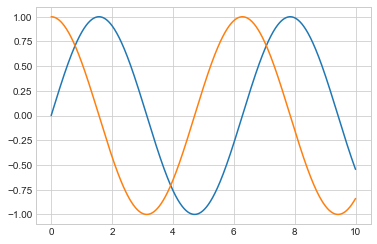

In [2]:
# create a fog and axe
fig = plt.figure()
ax = plt.axes()

# plot data
x = np.linspace(0,10,1000)
ax.plot(x, np.sin(x))
ax.plot(x, np.cos(x));

To adjust the color, you can use the color keyword, which accepts a string argument representing virtually any imaginable color. The color can be specified in a variety of ways

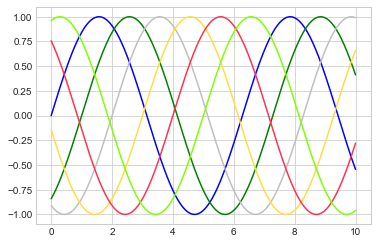

In [3]:
# change color
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported


Similarly, the line style can be adjusted using the linestyle keyword:

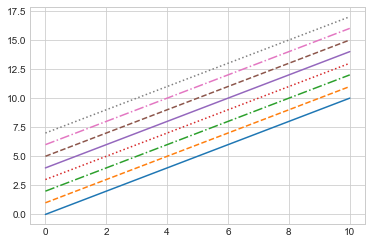

In [4]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

linestyle and color codes can be combined into a single non-keyword argument to the plt.plot() function

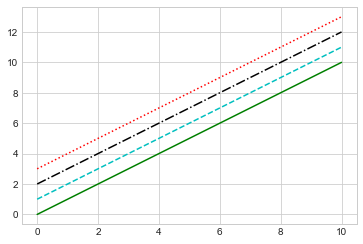

In [5]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## Adjusting the Plot: Axes Limits
* The most basic way to adjust axis limits is to use the plt.xlim() and plt.ylim() method
* The plt.axis() method allows you to set the x and y limits with a single call, by passing a list which specifies [xmin, xmax, ymin, ymax]

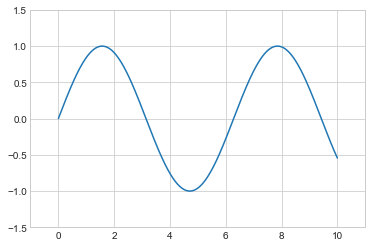

In [6]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

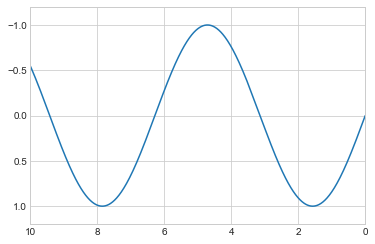

In [7]:
# display the axis in reverse 
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

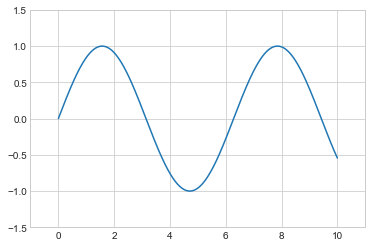

In [8]:
# plt.axis()

plt.axis([-1, 11, -1.5, 1.5])
plt.plot(x, np.sin(x));

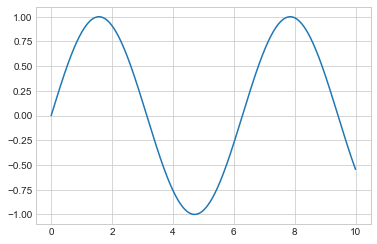

In [9]:
plt.plot(x, np.sin(x))
plt.axis('tight'); #automatically tighten the axix 

## Labeling Plots

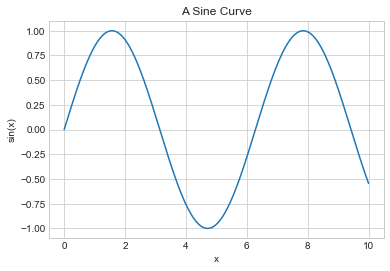

In [10]:

plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

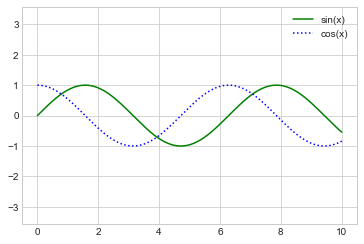

In [11]:
#plt legend
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal') #ensuring an equal aspect ratio so that on your screen

plt.legend();

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the **ax.set()** method to set all these properties at once:

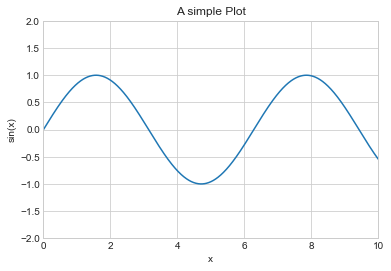

In [12]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0,10),
       ylim=(-2,2),
       xlabel='x',
       ylabel='sin(x)',
       title= 'A simple Plot'
      );

# Simple Scatter Plot

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

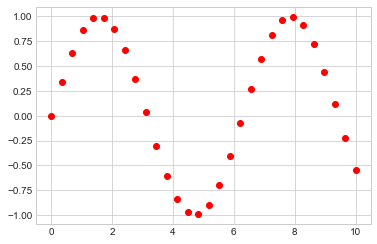

In [14]:
x = np.linspace(0,10,30)
y = np.sin(x)
fig = plt.figure()
ax = plt.axes()

plt.plot(x,y,'or');

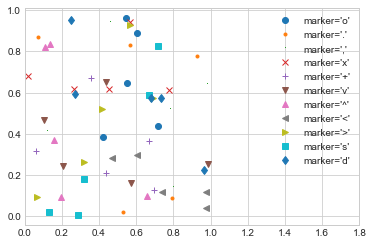

In [15]:
# marker style
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

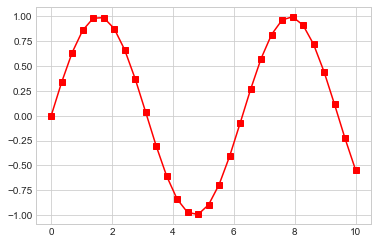

In [16]:
# combine marks and line
plt.plot(x,y,'-rs')

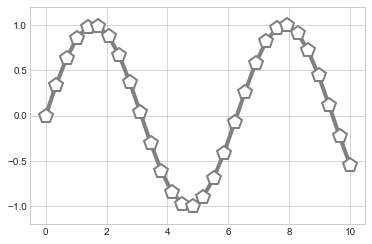

In [17]:
#style
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4, 
         markerfacecolor='white',#marker inside
         markeredgecolor='gray',#marker edge
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

**plt.scatter** from plt.plot is that it can be used to create scatter plots where the properties of each **individual point (size, face color, edge color, etc.)** can be individually controlled or mapped to data

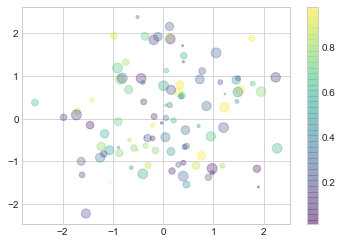

In [18]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 100 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
#Notice that the color argument is automatically mapped to a color scale (shown here by the colorbar() command)

# Visualizing Errors

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ErrorbarContainer object of 3 artists>

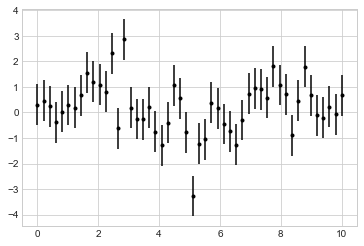

In [20]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy, fmt='.k')

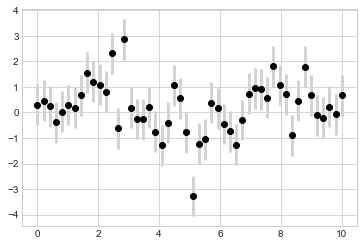

In [21]:
# change style
plt.errorbar(x, y, yerr=dy, fmt='o', 
             color='black', # center point color
             ecolor='lightgray', #error range color
             elinewidth=3, capsize=0);

## Continuous Errors

In [22]:
# import gaussian process regression
from sklearn.gaussian_process import GaussianProcess

# define model and draw some data
model = lambda x:x*np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (/Users/bowenduan/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/__init__.py)

# Density and Contour Plots

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

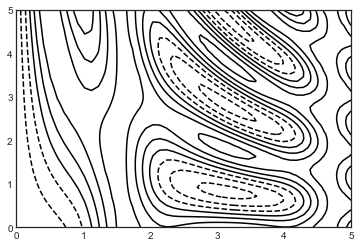

In [29]:
# build up a contour data
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

x = np.linspace(0,5,50)
y = np.linspace(0,5,50)

X, Y = np.meshgrid(x,y) # builds two-dimensional grids from one-dimensional arrays
Z = f(X,Y)

# plot contour
plt.contour(X,Y,Z, colors = 'black'); # plot a contour

# negative values are represented by dashed lines, 
# and positive values by solid lines.

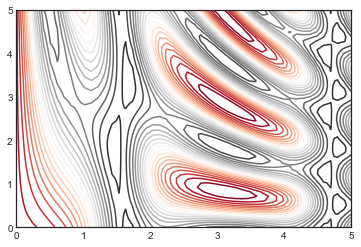

In [30]:
plt.contour(X,Y,Z, 20, cmap = 'RdGy');

# argument '20', means draw the lines at 20 line space
# cmap is for color map 
# plt.cm.<TAB> to select the color map option

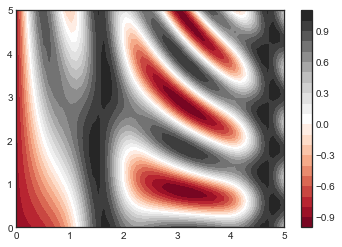

In [31]:
plt.contourf(X, Y, Z, 20, cmap='RdGy') # a filled contour plot decrease distraction
plt.colorbar();

### plt.imshow()
* interprets a two-dimensional grid of data as an image
* plt.imshow() doesn't accept an x and y grid, so you must manually specify the extent [xmin, xmax, ymin, ymax] of the image on the plot.
* plt.imshow() by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
* plt.imshow() will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, plt.axis(aspect='image') to make x and y units match.

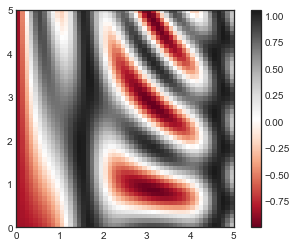

In [32]:
plt.imshow(Z, 
           extent=[0, 5, 0, 5], # set up the limit
           origin='lower', # set the origin
           cmap='RdGy'
          )
plt.colorbar()
plt.axis(aspect='image'); # make x and y units match 

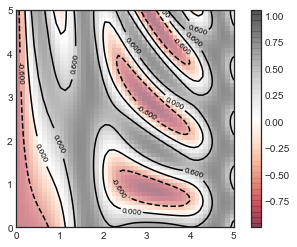

In [33]:
# combine contour plots and image plots
contours = plt.contour(X,Y,Z, 3, colors = 'black')

# overplot contours with labels on the contours themselves
plt.clabel(contours, inline=True, fontsize = 8)

# put another plot on it 
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)

plt.colorbar();

# Histograms, Binnings, and Density

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('seaborn-white')
data = np.random.randn(10000)

plt.hist() for displaying 

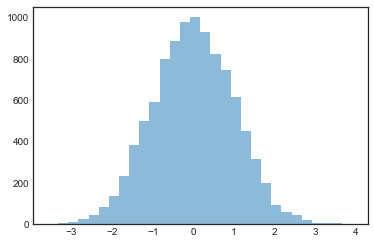

In [35]:
plt.hist(data, bins=30, alpha=0.5);

''

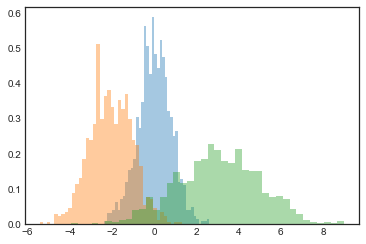

In [36]:
# comparing dataset
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled',alpha=0.4,density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
;

plt.histogram for show the data not displaying the figm

In [37]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 174 2641 5361 1741   83]


## Two-Dimensional Histograms and Binnings

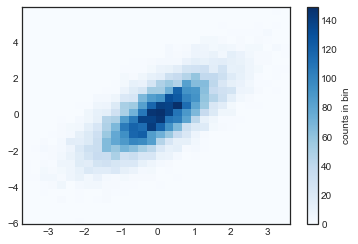

In [38]:
# create data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# two-dimensional histogram
plt.hist2d(x,y,bins=30,cmap='Blues')

# name the color map bar
cb = plt.colorbar()
cb.set_label('counts in bin')

### Hexagonal binnings
plt.hexbin() represents a two-dimensional dataset binned within a grid of hexagons

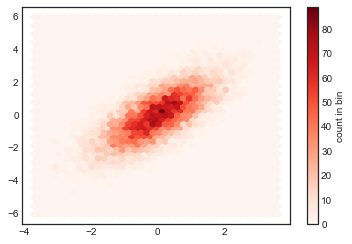

In [39]:
plt.hexbin(x,y,gridsize=40,cmap='Reds')
cb = plt.colorbar(label = 'count in bin');

# Customizing Plot Legends

In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('classic')

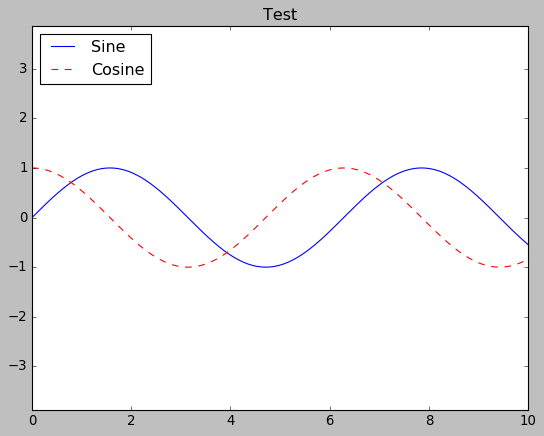

In [41]:
# create dataset
x = np.linspace(0,10,1000)

fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b',label = 'Sine')
ax.plot(x, np.cos(x), '--r',label = 'Cosine')
ax.axis('equal')
plt.title('Test')
plt.legend(loc='upper left');

## Multiple Legends
ax.add_artist() method to manually add the second artist to the plot:

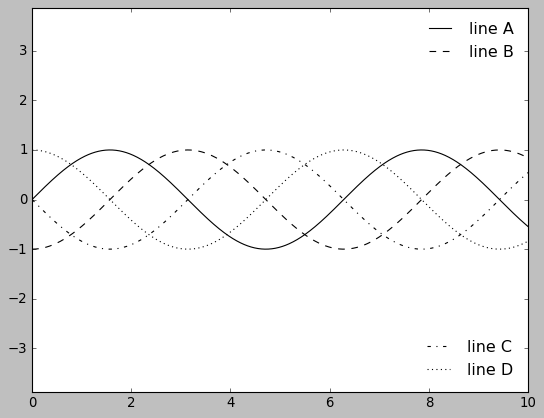

In [42]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

In [43]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)


from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

NameError: name 'digits' is not defined

# Multiple Subplots

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

##  plt.axes: Subplots by Hand

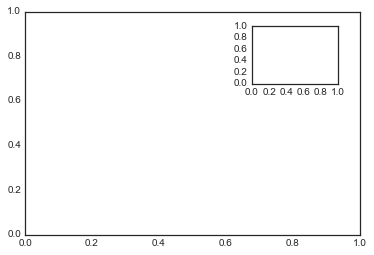

In [45]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

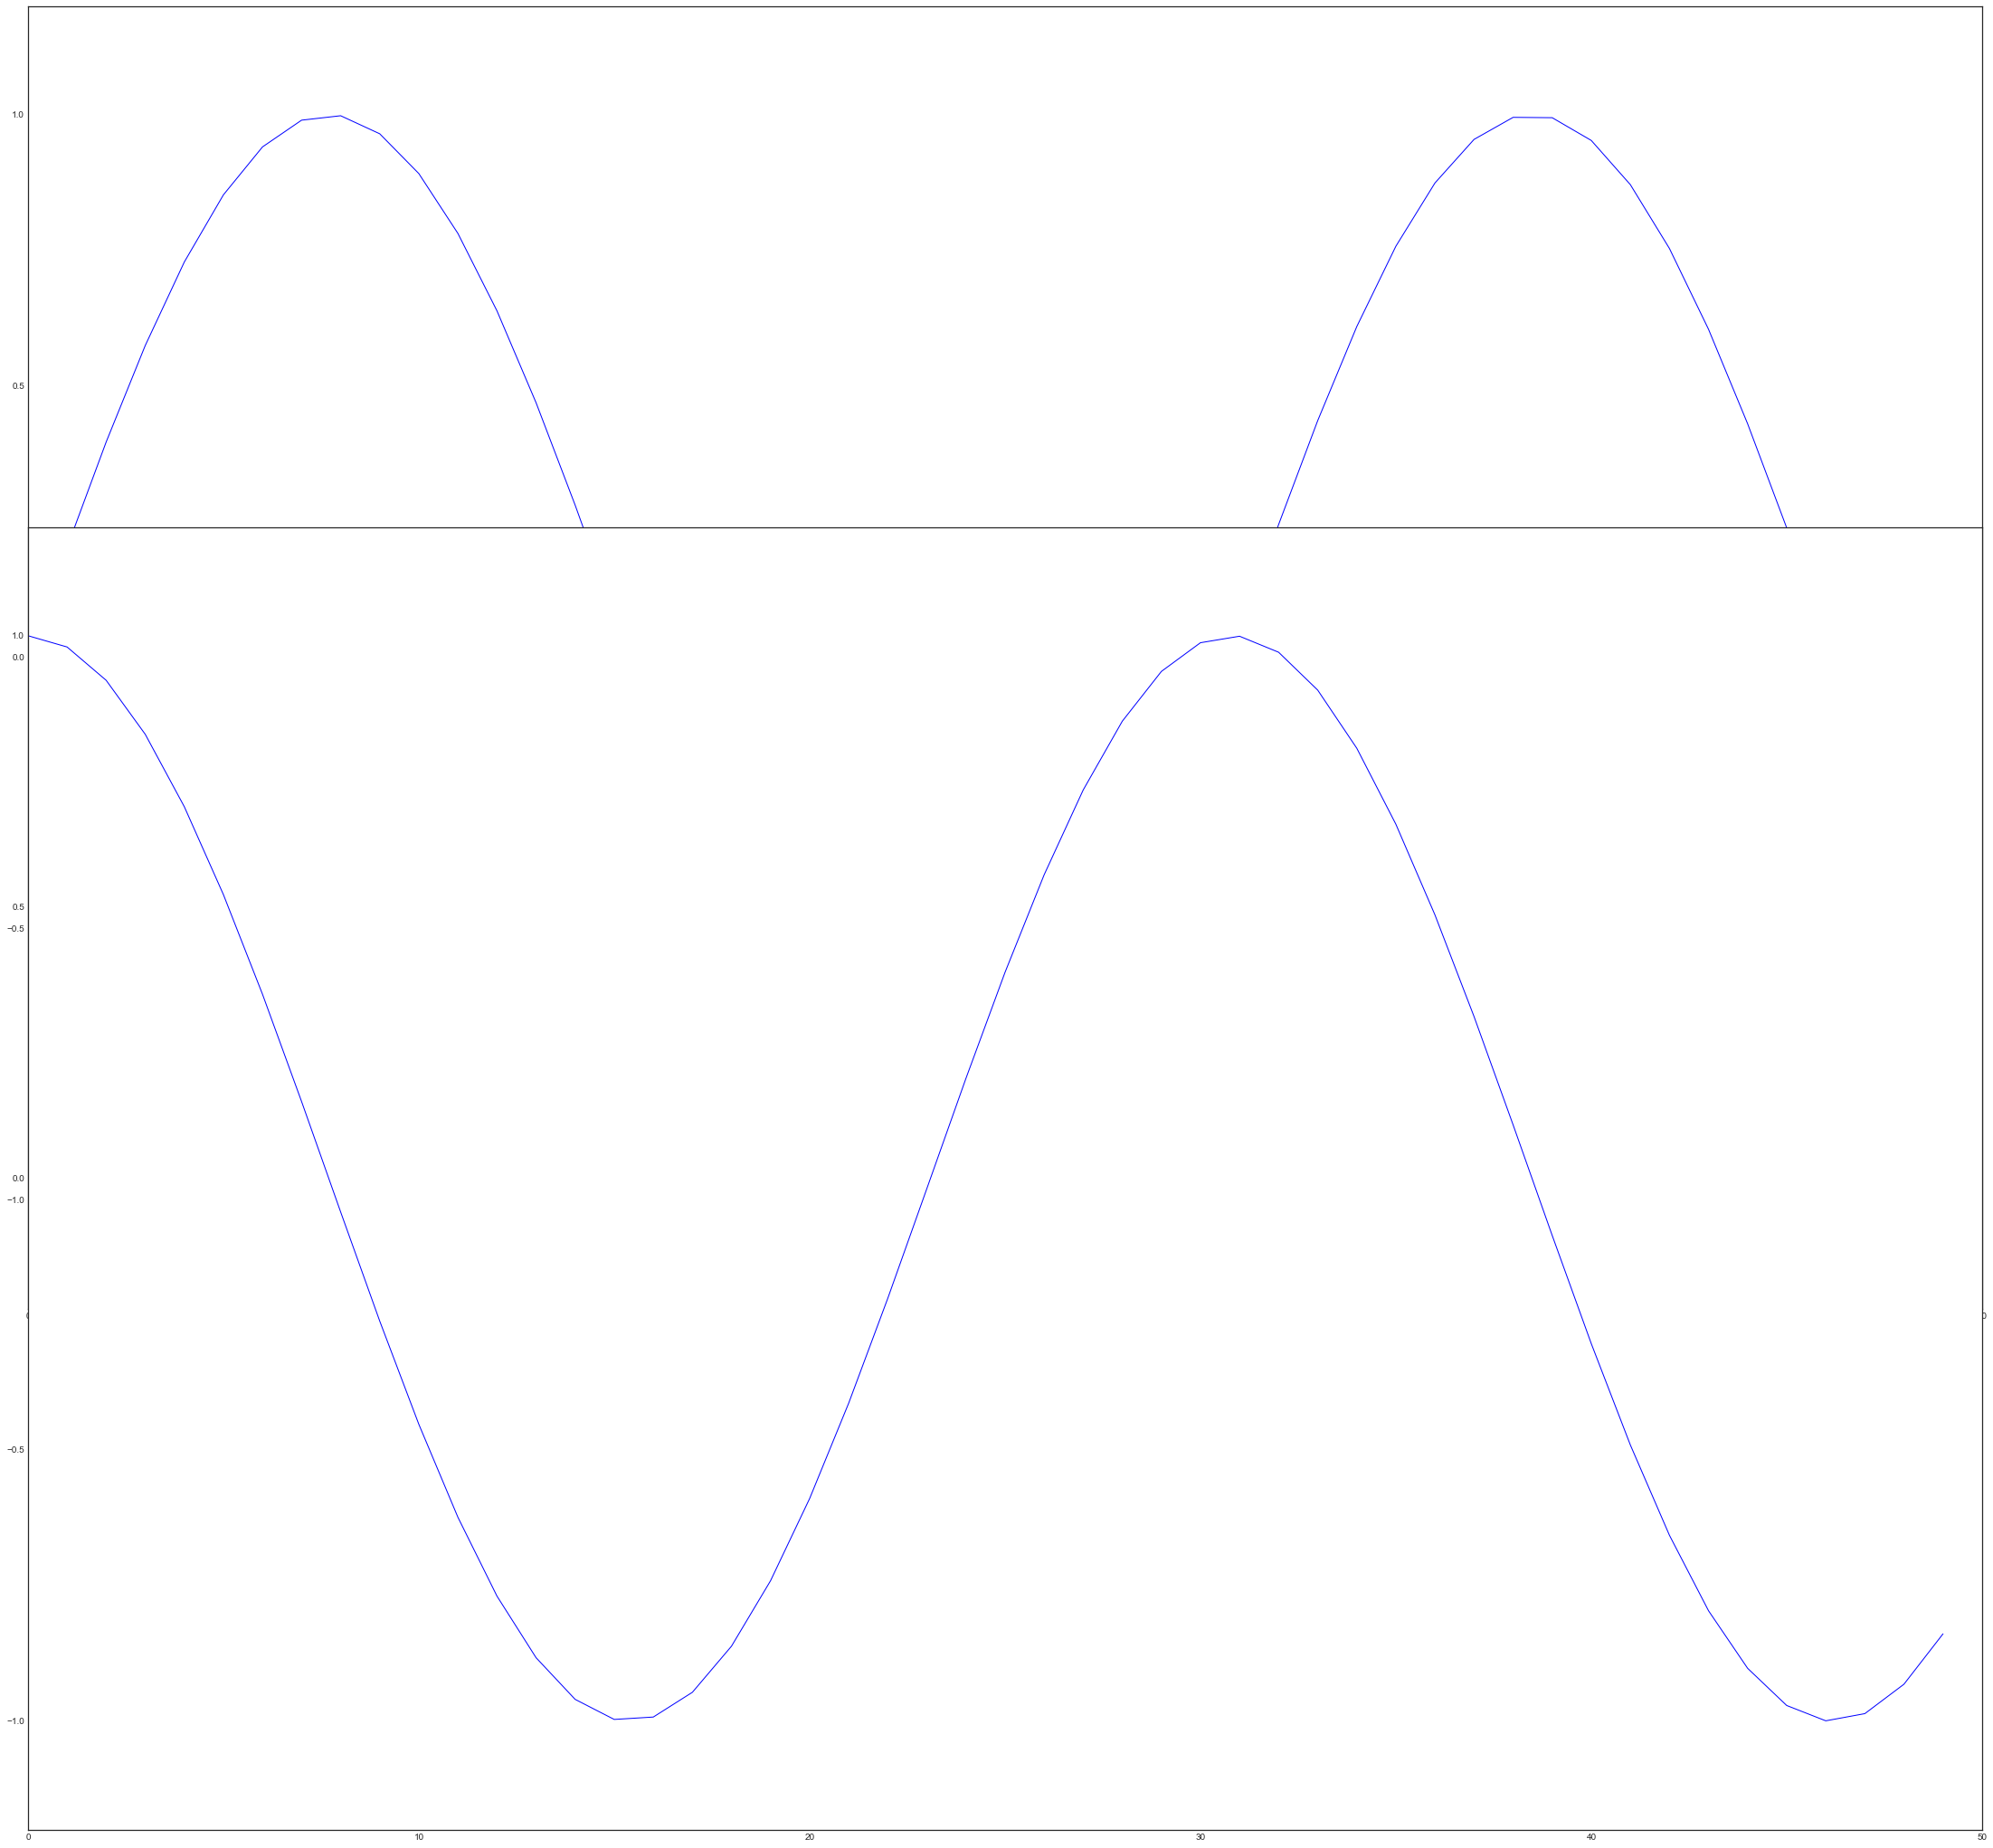

In [46]:
fig = plt.figure()

ax1 = fig.add_axes([0,4,5,5],ylim=(-1.2,1.2))
ax2 = fig.add_axes([0,2,5,5],ylim=(-1.2,1.2))

x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## plt.subplot: Simple Grids of Subplots

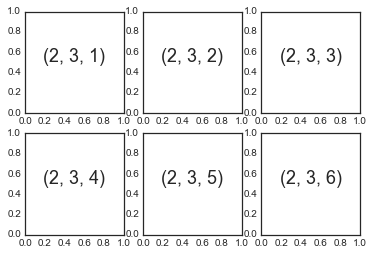

In [47]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
            fontsize=18,
            ha='center')

plt.subplots_adjust() can be used to adjust the spacing between these plots. 

*  hspace and wspace arguments of plt.subplots_adjust, which specify the spacing along the height and width of the figure

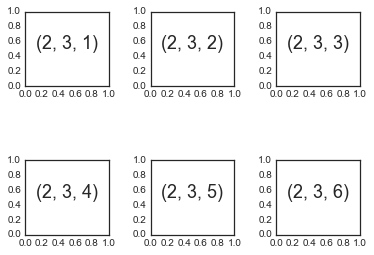

In [48]:
fig =plt.figure()
fig.subplots_adjust(hspace=1,wspace=0.5)
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
            fontsize=18,
            ha='center')

## plt.subplots: The Whole Grid in One Go¶

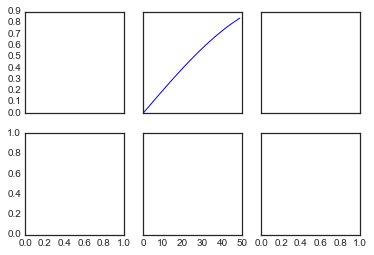

In [49]:
fig, ax = plt.subplots(2,3,
                       sharex='col',sharey='row'# removed inner labels on the grid
                      )

# plot data 

x = np.linspace(0,1)
ax[0,1].plot(np.sin(x))

## plt.GridSpec: More Complicated Arrangements
* To go beyond a regular grid to subplots that span multiple rows and columns, plt.GridSpec() is the best tool. 
*  The plt.GridSpec() object does not create a plot by itself; it is simply a convenient interface that is recognized by the plt.subplot() command.

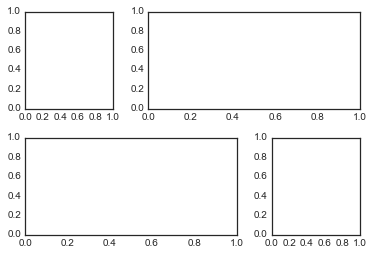

In [50]:
# create grid
grid  = plt.GridSpec(2,3,wspace=0.4,hspace=0.3)

# organize subplots
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

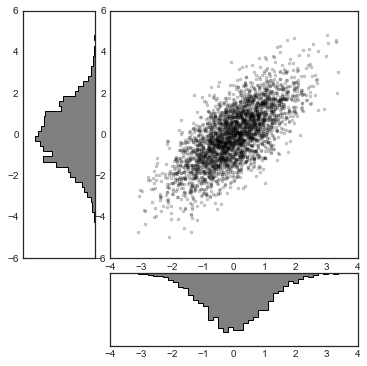

In [51]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x,y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis() # invert the yaxis

y_hist.hist(y, 40, histtype='stepfilled',
             orientation='horizontal',color='gray');
y_hist.invert_xaxis()

# Text and Annotation

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [53]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day']=births['day'].astype(int)

births.index = pd.to_datetime(10000*births.year + 
                             100*births.month + 
                             births.day,
                             format = '%Y%m%d')

births_by_date = births.pivot_table('births',
                                   [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012,month,day)
                       for (month, day) in births_by_date.index]

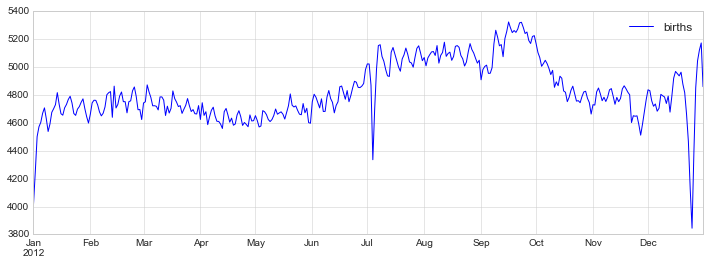

In [54]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax =ax );

plt.text/ax.text command, which will place text at a particular x/y value

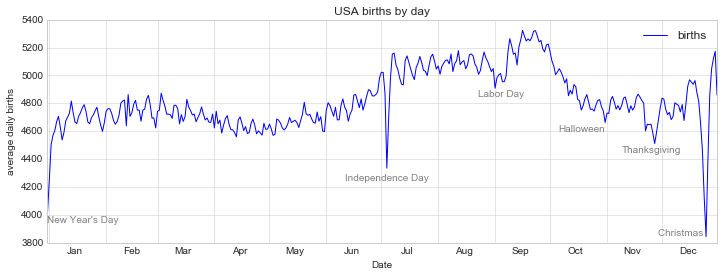

In [55]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax =ax );

#add labels to the plot
style = dict(size = 10, color = 'grey')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style);

# label axes
ax.set(title = 'USA births by day',
      xlabel = 'Date',
      ylabel = 'average daily births');

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

## Transforms and Text Position
* ax.transData(): Transform associated with data coordinates
* ax.transAxes(): Transform associated with the axes (in units of axes dimensions)
* fig.transFigure(): Transform associated with the figure (in units of figure dimensions)

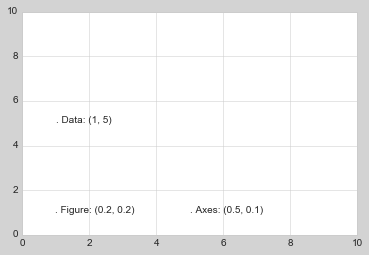

In [56]:

fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

# "." at the beginning of each string will approximately mark the given coordinate location.


## Arrows and Annotation
plt.annotate() function. This function creates some text and an arrow, and the arrows can be very flexibly specified

Text(2, -6, 'local minimum')

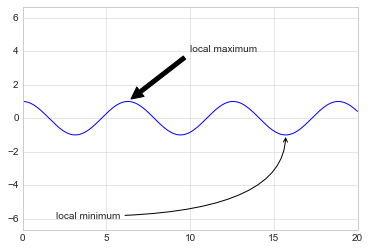

In [57]:
fig, ax = plt.subplots()

x = np.linspace(0,20,1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum',xy=(6.28,1), xytext=(10,4),
           arrowprops=dict(facecolor='black',shrink = 0.05))

ax.annotate('local minimum',xy=(5*np.pi, -1),xytext=(2,-6),
           arrowprops = dict(arrowstyle = "->",
                            connectionstyle = "angle3,angleA=0,angleB=-90"))

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
plot.xaxis.set_major_locator(mpl.dates.MonthLocator
plot.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
plot.xaxis.set_major_formatter(plt.NullFormatter())
plot.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
                           
x.set_ylim(3600, 5400);

SyntaxError: invalid syntax (<ipython-input-58-551882330edf>, line 46)

# Three-Dimensional Plotting in Matplotlib

In [59]:
from mpl_toolkits import mplot3d # import 3D sub-moduel 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

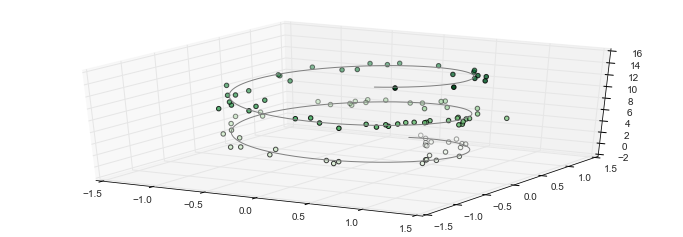

In [60]:
fig = plt.figure(figsize = (12,4))
ax = plt.axes(projection = '3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Three-dimensional Contour Plots

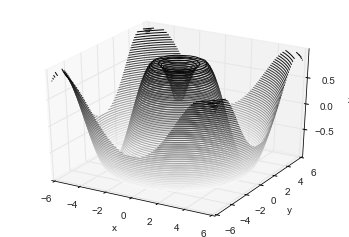

In [61]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



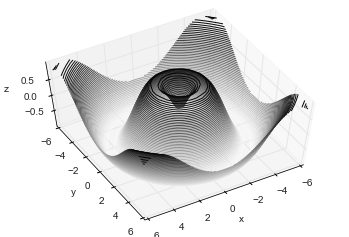

In [62]:
ax.view_init(60, 60)
fig

# [Geographic Data with Basemap](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html)

In [63]:
conda install basemap

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [ ]:

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);